In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from pydmd import DMD
from pydmd.plotter import plot_summary
import cv2

In [3]:
cylinder = scipy.io.loadmat('../DATA/DATA/FLUIDS/CYLINDER_ALL.mat')

In [4]:
for key in cylinder.keys():
    if key.startswith('__'):
        continue
    print(key + ': ' + str(cylinder[key].shape))

UALL: (89351, 151)
UEXTRA: (89351, 1)
VALL: (89351, 151)
VEXTRA: (89351, 1)
VORTALL: (89351, 151)
VORTEXTRA: (89351, 1)
m: (1, 1)
n: (1, 1)
nx: (1, 1)
ny: (1, 1)


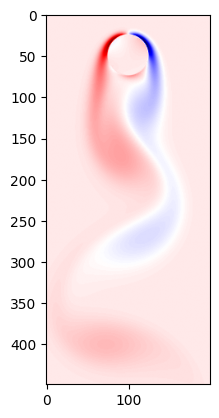

In [5]:
plt.imshow(cylinder['VORTALL'][:, 1].reshape(449, 199), cmap='seismic')

In [74]:
selected_key = 'UALL'
print(cylinder[selected_key].max())
print(cylinder[selected_key].min())
cylinder_norm = (cylinder[selected_key] - cylinder[selected_key].min()) / (cylinder[selected_key].max() - cylinder[selected_key].min())
print(cylinder_norm.max())
print(cylinder_norm.min())

1.31447
-0.238083
1.0
0.0


In [75]:
cmap = plt.get_cmap('seismic')

# write to video
out = cv2.VideoWriter('cylinder.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 30, ( 449, 199), True)

for i in range(cylinder_norm.shape[1]):
    frame_img = cmap(cylinder_norm[:, i])[:, :3]  # Convert to RGB
    frame = frame_img.reshape(449, 199, -1).swapaxes(1, 0)  # Transpose to match video format
    out.write(np.uint8(frame * 255.0))  # Normalize to [0, 255]
out.release()


In [76]:
from pydmd import BOPDMD
dmd = BOPDMD(svd_rank=10, num_trials=0, eig_constraints={"conjugate_pairs"})
dmd.fit(cylinder_norm, t=np.arange(cylinder_norm.shape[1]))
# set matplotlib background to transparent
plt.rcParams['figure.facecolor'] = '#FFFFFF8F'
summary_fig = plot_summary(
    dmd, # <-- Fitted PyDMD model. Can be DMD, BOPDMD, etc.
    figsize=(12, 7),
    index_modes=(0, 2, 4),
    snapshots_shape=(449, 199),
    order="F",
    mode_cmap="seismic",
    dynamics_color="k",
    flip_continuous_axes=True,
    max_sval_plot=30,
    filename='cylinder_summary.png',
)

In [ ]:
summary_fig.show()

AttributeError: 'NoneType' object has no attribute 'show'

In [ ]:
mode_frames = np.empty((dmd.modes.shape[1], dmd.dynamics.shape[1] , dmd.modes.shape[0]))
for i in range(dmd.modes.shape[1]):
    mode_frames[i] = np.outer( dmd.dynamics[i, :],dmd.modes[:, i])
#mode_frames = mode_frames.reshape(dmd.modes.shape[1], dmd.dynamics.shape[1], 449, 199)
mode_frames.shape
print(mode_frames.max(), mode_frames.min())
mode_frames_norm = (mode_frames - mode_frames.min()) / (mode_frames.max() - mode_frames.min())
# write to videos
for i, mode in enumerate(mode_frames_norm):
    out = cv2.VideoWriter(f'cylinder_mode_{i+1}.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 30, (449, 199), False)
    for j, frame in enumerate(mode):
        frame_img = cmap(frame)[:, :3]  # Convert to RGB
        frame = frame.reshape(449, 199, -1).swapaxes(1, 0)  # Transpose to match video format
        out.write(np.uint8(frame * 255.0))  # Normalize to [0, 255]
    out.release()

/tmp/ipykernel_6521/177449781.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  mode_frames[i] = np.outer( dmd.dynamics[i, :],dmd.modes[:, i])


0.4856129789526096 -0.14705487636610387


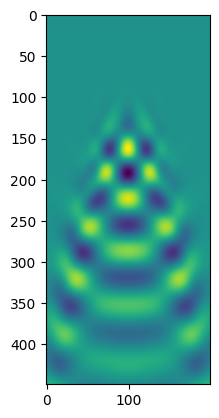

In [105]:
plt.imshow(mode_frames_norm[1,0].reshape(449, 199))

In [61]:
ecog = scipy.io.loadmat('../DATA/DATA/NEURO/ecog_window.mat')
for key in ecog.keys():
    if key.startswith('__'):
        continue
    print(key + ': ' + str(ecog[key].shape))

print(ecog['good_channels'])

X: (59, 500)
dt: (1, 1)
good_channels: (1, 59)
myview: (1, 2)
t: (1, 500)
trodes: (64, 3)
[[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
  25 26 27 28 29 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
  50 51 52 53 54 55 56 57 59 60 64]]


In [65]:
ecog_full = np.zeros((64, ecog['X'].shape[1]))
for i, chnr in enumerate(ecog['good_channels'][0]):
    ecog_full[chnr-1, :] = ecog['X'][i, :]

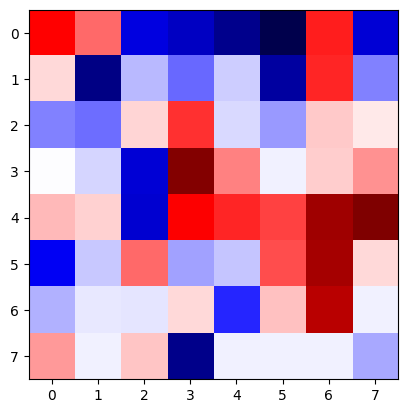

In [66]:
plt.imshow(ecog_full[:, 0].reshape(8, 8), cmap='seismic')